### 목표
>- 500명의 키와 몸무게, 비만도 라벨을 이용해 비만을 판단하는 모델을 만들어 보자

In [36]:
import pandas as pd  #데이터프레임 활용            #(만약 as pd.read_csv처럼 쓴다면 판다스안의 함수를 사용하겠다는 것 ) 
import matplotlib.pyplot as plt    #시각화         #표를 그릴때 특화된 matplotlib (데이터를 x,y값 가져와서 차트로 만들어줌)
#bar chart -> 빈도수 체크시 많이 사용
#pie chart -> 비율, 분포도 볼 때 많이 사용(전체를 100프로로 보고 얼마나 차지하고 있는지)
#histogram -> 빈도수(바차트와 혼용되어 사용하기도 함_1등석에 몇명탑승, 2등석에 몇명탑승.. 혼자탑승 몇명, 2명이탑승 몇명.. ...)
#pyplot: 시각화 기능, 비대화형
#pylab : 시각화+numpy, 대화형
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics      # 평가를 위한 모듈     (=> 아래서 metrics이용하여 score 구했음)
from sklearn.metrics import classification_report

In [37]:
# 한글을 쓰기 위한 코드
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties (fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

>- 데이터를 로드해보자

In [38]:
bmi = pd.read_csv("./Data/bmi_500.csv")   #bmi_500파일을 읽어서 데이터 프레임에 집어 넣기
#bmi.head(20)    #전체 목록 중에서 처음에서부터 20개를 보여주시오
bmi.tail()       #전체 목록 중에서 끝에서 5개를 보여주시오

,Gender,Height,Weight,Label
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity
499,Male,173,131,Extreme Obesity


In [39]:
!dir

 C 드라이브의 볼륨: SYSTEM
 볼륨 일련 번호: 340F-E044

 C:\Users\SMT078\Documents\Python\머신러닝 디렉터리

2020-08-14  오전 09:44    <DIR>          .
2020-08-14  오전 09:44    <DIR>          ..
2020-08-13  오후 12:26    <DIR>          .ipynb_checkpoints
2020-08-11  오전 10:19             5,688 1. XOR 연산 (20200811).ipynb
2020-08-11  오전 10:19             4,510 2. AND 연산.ipynb
2020-08-14  오전 09:44            64,373 3. 모델링 처리.ipynb
2020-08-13  오후 12:44           662,613 4.(cf.) matplotlib (20200813~).ipynb
2020-08-13  오후 12:25           174,135 5. seaborn.ipynb
2020-08-13  오후 02:05           121,990 6. folium.ipynb
2020-08-13  오후 12:50    <DIR>          Data
2020-08-13  오후 12:39             3,006 seoul.htm
2020-08-13  오후 12:41            69,688 seoul3.htm
               8개 파일           1,106,003 바이트
               4개 디렉터리  432,286,720,000 바이트 남음


In [40]:
#my_boolean1 = (bmi['Label']=='Normal')
#my_boolean2 = (bmi['Label']=='Obesity')
#my_boolean
bmi[bmi['Label']=='Normal']   #boolean indexing ==> true에 해당하는 값만 추출하여 보여줌
#bmi[my_boolean1 | my_boolean2]

,Gender,Height,Weight,Label
1,Male,189,87,Normal
10,Male,195,81,Normal
13,Male,155,51,Normal
14,Male,191,79,Normal
24,Female,172,67,Normal
...,...,...,...,...
472,Female,178,65,Normal
477,Male,167,64,Normal
478,Female,151,55,Normal
487,Male,187,80,Normal


In [41]:
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [42]:
bmi.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [43]:
bmi['Label'].unique()   #레이블의 중복성 제거   ##전체적으로  데이터 label이 '어떻게 구성되어있는지' 알 수 있음. 

array(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'], dtype=object)

In [108]:
def mScatter(m_label, m_color):
   # m_bmi #멤버변수 설정시 m_ 많이 사용
    tmp_Boolean = (bmi['Label']==m_label)
    tmp_list = bmi[ tmp_Boolean ]
    plt.scatter(tmp_list['Weight'],
                tmp_list['Height'],
                c = m_color,
                label = m_label)

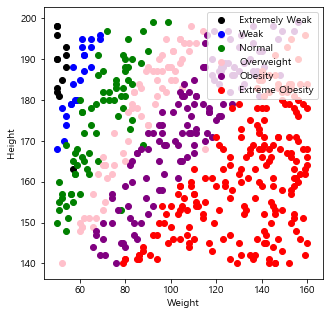

In [109]:
plt.figure(figsize = (5,5))            #차트 사이즈 설정
mScatter('Extremely Weak', 'black')    #'컬럼명(feature_머신러닝에선)'', '색상'
mScatter('Weak', 'blue')
mScatter('Normal', 'green')
mScatter('Overweight', 'pink')
mScatter('Obesity', 'purple')
mScatter('Extreme Obesity', 'red')

plt.legend(loc = 'upper right')  # 범례 표시
plt.xlabel('Weight')             # X축 이름
plt.ylabel('Height')             # Y축 이름
plt.show()     #전체적인 표를 보여달라

## 모델링 처리

1. 데이터를 로드한다.

2. 문제와 답을 분리한다.

3. 훈련셋과 검증셋으로 분리한다.(일반적으로 7:3 비율로 설정한다)

4. 모델을 생성한다.(hyper parameter를 설정한다)

5. 학습을 수행한다.

6. 평가를 수행한다.

#### 1. 데이터를 로드한다

In [46]:
data = pd.read_csv("./Data/bmi_500.csv")

#### 2. 문제와 답을 분리한다

In [47]:
X = data.loc[ : , 'Height':'Weight'] #cf. iloc(: 일부구간을 설정할때 사용)
        # 행(: >> 처음~끝 전부),   열(키,몸무게만 가져옴)
y = data.loc[ : , 'Label']  #전체행, label값만 가져옴

#정확히 범주 설정시는 loc 사용(정확하기 때문!)

In [48]:
X

,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61
...,...,...
495,150,153
496,184,121
497,141,136
498,150,95


In [49]:
y  #정답데이터

0              Obesity
1               Normal
2              Obesity
3           Overweight
4           Overweight
            ...       
495    Extreme Obesity
496            Obesity
497    Extreme Obesity
498    Extreme Obesity
499    Extreme Obesity
Name: Label, Length: 500, dtype: object

In [50]:
print(X.shape)
print(y.shape)    # 단계별로 데이터 확인해주고 넘어가는 습관

(500, 2)
(500,)


#### 3. 데이터를 훈련셋과 검증셋으로 분리한다.

In [51]:
X_train = X.iloc[:350]     #훈련용 문제 추출(70%)
X_test = X.iloc[350:]      #검증용 문제 추출(30%)

y_train = y.iloc[:350]     #훈련용 정답 추출(70%)
y_test = y.iloc[350:]      #검증용 정답 추출(30%)

In [52]:
print(X_train.shape)  #데이터가 잘 뽑아졌는지 확인 (shape는 필드가2개였기때문에 여기서 2 출력됨)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(350, 2)
(150, 2)
(350,)
(150,)


#### 4. 모델을 생성한다 (hyper parameter 설정)

#### KNN(K-Nearest Neighbors): 최근접 이웃 알고리즘

- 작은 데이터셋일 경우, 다른 모델을 선택하기 전에 테스트 목적으로 주로 사용됨
- 이후 복잡한 모델을 선택하여 재 훈련
- 분류를 위한 최근접 이웃의 대표적인 알고리즘 ( KNeighborsClassifier알고리즘 )

In [81]:
knn_model = KNeighborsClassifier(n_neighbors = 9)   #()값이 hyperParameter #이웃값이 크다고 무조건 좋은것은 아님(정확도가 떨어짐)

#### 5. 학습 및 평가 

In [82]:
# 5-1. 훈련용 문제 데이터셋과 훈련용 정답 데이터셋으로 훈련을 시작한다.
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [83]:
# 5-2. 검증용 문제 데이터셋으로 모델 평가를 수행한다.
pred = knn_model.predict(X_test)   #predict 함수는 예측을 수행할 때 사용한다

In [84]:
pred

array(['Overweight', 'Normal', 'Normal', 'Extreme Obesity',
       'Extremely Weak', 'Obesity', 'Obesity', 'Extreme Obesity', 'Weak',
       'Extreme Obesity', 'Weak', 'Extreme Obesity', 'Extreme Obesity',
       'Obesity', 'Extreme Obesity', 'Extreme Obesity', 'Overweight',
       'Obesity', 'Extreme Obesity', 'Obesity', 'Overweight',
       'Extreme Obesity', 'Weak', 'Normal', 'Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Obesity', 'Overweight',
       'Extreme Obesity', 'Weak', 'Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Normal', 'Extreme Obesity', 'Obesity',
       'Overweight', 'Normal', 'Normal', 'Normal', 'Normal', 'Overweight',
       'Extreme Obesity', 'Overweight', 'Overweight', 'Extreme Obesity',
       'Overweight', 'Extreme Obesity', 'Overweight', 'Obesity', 'Normal',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Normal',
       'Extreme Obesity', 'Extreme Obesity', 'Extreme Obesity', 'Weak',
       'Obesity', 'Extreme Obesity'

In [86]:
# 5-3. 검증용 정답 데이터셋으로 모델 평가를 도출한다.
metrics.accuracy_score(pred, y_test)   #( ) 안의 순서는 상관 없음   #보통90%넘으면 과대적합이라 하기도 함

0.9133333333333333

### 자신의 몸무게 및 키 정보를 입력하여 실제 비만도를 측정해보자!

In [87]:
#data2 = pd.DataFrame([['Female',키,몸무게,비만도]])

In [88]:
X_test   #2차원데이터

,Height,Weight
350,184,83
351,197,88
352,160,51
353,184,153
354,190,50
...,...,...
495,150,153
496,184,121
497,141,136
498,150,95


In [89]:
pred = knn_model.predict([[180, 70]])

In [90]:
pred  #91프로의 확률로 Normal일 수 있음!

array(['Normal'], dtype=object)

# 2020-08-12

### 과대/과소 적합 확인

- 우리가 만든 모델의 훈련 스코어와 검증 스코어를 도출하여 훈련과 검증의 효율을 분석하자.
- 훈련용 문제 데이터 셋을 입력하여 pred-train 변수에 정답을 저장

In [91]:
pred_train = knn_model.predict(X_train)   #과대적합 과소적합 알기위해 훈련용 데이터도 필요 한 것

- 앞에서 수행한 "훈련용" 문제 데이터셋(pred_train)에 대한 모델의 도출 결과와 훈련용 정답셋을 비교하여 훈련용 데이터에 대한 스코어 도출

- F1-measure 도출


In [92]:
metrics.accuracy_score(pred_train, y_train)  

0.9057142857142857

### 전체적인 스코어를 출력해보자

In [93]:
print(classification_report(pred_train, y_train))

                 precision    recall  f1-score   support

Extreme Obesity       0.99      0.96      0.97       140
 Extremely Weak       0.90      0.75      0.82        12
         Normal       0.82      0.90      0.86        40
        Obesity       0.91      0.89      0.90        97
     Overweight       0.84      0.85      0.84        54
           Weak       0.55      0.86      0.67         7

       accuracy                           0.91       350
      macro avg       0.83      0.87      0.84       350
   weighted avg       0.91      0.91      0.91       350



### score 함수를 사용해보자

In [94]:
knn_model.score(X_test, y_test)     #검증용데이터가 더 잘 나왔음 => 아마도 과소적합에 빠졌다고 볼 수 있다

0.9133333333333333

In [95]:
knn_model.score(X_train, y_train)   #훈련용데이터

0.9057142857142857

### 하이퍼 파라미터 튜닝

- 몇명의 이웃을 설정하는 것이 가장 적합한지에 대해 시각화를 수행해보자

In [96]:
train_acc = []  #훈련 점수를 저장할 배열, 이웃의 수에 따른...        ##누적을 위한 두 변수
test_acc  = []  #검증 점수를 저장할 배열, 이웃의 수에 따른...

neighbor = range(1, 11)  #1에서 1-까지 반복 범위 설정

for n in neighbor : #1에서 10까지 반복 수행                      ##for문 이용하여 이웃수만큼(1~10까지) 반복하며 ==> 훈련시키고
    #반복 N값을 하이퍼파라미터인 이웃의 수에 대입  
    knn_model = KNeighborsClassifier(n_neighbors=n) #n값으로 모델 생성   ##=n으로 이웃바꿔가며 
    knn_model.fit(X_train, y_train)                 #훈련 수행
    
    train_acc.append(knn_model.score(X_train, y_train)) #훈련데이터 스코어 도출 및 저장        ##평가
    test_acc.append(knn_model.score(X_test, y_test))    #검증데이터 스코어 도출 및 저장

In [97]:
train_acc

[1.0,
 0.9485714285714286,
 0.9342857142857143,
 0.9485714285714286,
 0.9257142857142857,
 0.9085714285714286,
 0.9028571428571428,
 0.9057142857142857,
 0.9057142857142857,
 0.9085714285714286]

In [98]:
test_acc

[0.8866666666666667,
 0.8933333333333333,
 0.8933333333333333,
 0.8933333333333333,
 0.9066666666666666,
 0.92,
 0.9,
 0.9066666666666666,
 0.9133333333333333,
 0.9333333333333333]

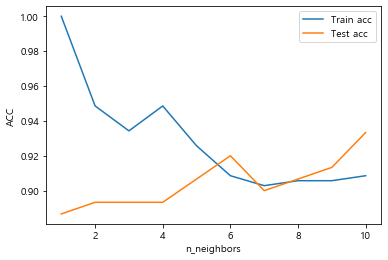

In [99]:
#훈련스코어 및 검증 스코어의 시각화 수행

#plt.plot(X축데이터, Y축 데이터, label=레이블 설정)
plt.plot(neighbor, train_acc, label = 'Train acc') #화면에 그래프 그려주는 명령어 'plot' (x축:이웃, y축:훈련용스코어누적값, label:)
plt.plot(neighbor, test_acc, label = 'Test acc')
plt.legend(loc = 'best')  #loc = 'best' <== 알아서 데이터없는 값 찾아서 자동으로 넣어줌
plt.ylabel('ACC')
plt.xlabel('n_neighbors')
plt.show()   # 안쓰면 누적되어 하나의 그림에 계속 차트 쌓아가며 그림(여기까지 하나의 그림 그려줌)
#훈련용 데이터가 검증용보다 좀 더 높은게 일반적(훈련용<검증용 == 과소적합)
#훈련용에 너무 특화됨(훈련용에서만 너무 잘 나옴) == 과대적합

### 성별을 추가하여 학습해보자

In [100]:
data2 = pd.read_csv("./Data/bmi_500.csv")

### 성별을 수치 데이터로 변경하자

In [101]:
data2['Gender'] = data2['Gender'].map({"Male": 0, "Female":1}) #특정값을 다른값으로 변환해주는 map함수
#문자열 데이터를 수식에 넣을 수 없기때문에 숫자값으로 변환해줌(비선형 알고리즘에 넣어주기 위함) ==> 원-핫(one-hot)encoding

In [102]:
data2

,Gender,Height,Weight,Label
0,0,174,96,Obesity
1,0,189,87,Normal
2,1,185,110,Obesity
3,1,195,104,Overweight
4,0,149,61,Overweight
...,...,...,...,...
495,1,150,153,Extreme Obesity
496,1,184,121,Obesity
497,1,141,136,Extreme Obesity
498,0,150,95,Extreme Obesity


### 문제와 정답을 분리

In [103]:
X2 = data2.iloc[:, :-1]   #훈련
y2 = data2.iloc[:, -1]    #정답

In [104]:
X2.head()

,Gender,Height,Weight
0,0,174,96
1,0,189,87
2,1,185,110
3,1,195,104
4,0,149,61


In [105]:
y2.head()

0       Obesity
1        Normal
2       Obesity
3    Overweight
4    Overweight
Name: Label, dtype: object

### 훈련데이터셋과 검증용데이터셋 분리

In [106]:
X_train2 = X2.iloc[:350, :] #70프로에 해당하는 350지점
X_test2  = X2.iloc[350:, :]

y_train2 = y2.iloc[:350]
y_test2  = y2.iloc[350:]

In [107]:
y_test2.shape

(150,)

In [110]:
#X_train2

,Gender,Height,Weight
0,0,174,96
1,0,189,87
2,1,185,110
3,1,195,104
4,0,149,61
...,...,...,...
345,1,184,106
346,1,191,68
347,0,162,58
348,0,178,138


## 모델 설정

In [113]:
knn_model2 = KNeighborsClassifier(n_neighbors = 10)
knn_model2.fit(X_train2, y_train2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [114]:
knn_model2.score(X_train2, y_train2)  #predict + accuracy 가 score라고 보아도..!! 

0.9085714285714286

In [115]:
knn_model2.score(X_test2, y_test2)

0.92

### 특징을 하나 추가하여 과소적합을 개선한 결과

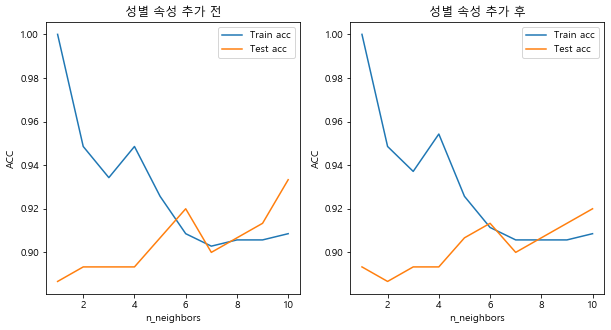

In [121]:
plt.figure(figsize = (10,5))

# 이전 차트 출력
plt.subplot(1,2,1) #(행,열,현재데이터)    ==>  첫번째 차트
plt.plot(neighbor, train_acc, label = 'Train acc') #화면에 "그래프" 그려주는 명령어 'plot' (x축:이웃, y축:훈련용스코어누적값, label:)
plt.plot(neighbor, test_acc, label = 'Test acc')   #(x축:이웃, y축:검증용스코어누적값, label:)
plt.legend(loc = 'best') #loc = 'best' <== 알아서 데이터없는 값 찾아서 자동으로 넣어줌
plt.ylabel('ACC')
plt.xlabel('n_neighbors')
plt.title("성별 속성 추가 전")



####이웃의 수를 1에서 10까지 변경하면서 훈련 점수를 도출 ####
train_acc2 = []  #훈련 점수를 저장할 배열, 이웃의 수에 따른...        ##누적을 위한 두 변수
test_acc2  = []  #검증 점수를 저장할 배열, 이웃의 수에 따른...

neighbor2 = range(1, 11)  #1에서 1-까지 반복 범위 설정

for n in neighbor2 : #1에서 10까지 반복 수행                      ##for문 이용하여 이웃수만큼(1~10까지) 반복하며 ==> 훈련시키고
    #반복 N값을 하이퍼파라미터인 이웃의 수에 대입  
    knn_model2 = KNeighborsClassifier(n_neighbors=n) #n값으로 모델 생성   ##=n으로 이웃바꿔가며 
    knn_model2.fit(X_train2, y_train2)                 #훈련 수행
    
    train_acc2.append(knn_model2.score(X_train2, y_train2)) #훈련데이터 스코어 도출 및 저장        ##평가
    test_acc2.append(knn_model2.score(X_test2, y_test2))
    
    
    
plt.subplot(1,2,2)#(행,열,현재데이터)    ==>  두번째 차트
plt.plot(neighbor2, train_acc2, label = 'Train acc') 
plt.plot(neighbor2, test_acc2, label = 'Test acc')
plt.legend(loc = 'best')
plt.ylabel('ACC')
plt.xlabel('n_neighbors')
plt.title("성별 속성 추가 후")
plt.show()

In [123]:
print('a'+'x'+'a')

axa


## 특성추출

### 특성추출을 통해 과소적합을 해결해보자

In [137]:
X_train

,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61
...,...,...
345,184,106
346,191,68
347,162,58
348,178,138


In [129]:
# 특성 추출
X_train3 = X_train.copy()
col = X_train3.columns

for i in range(col.size):
    for j in range(i, col.size):
        X_train3[col[i]+' x '+col[j]] = X_train3[col[i]]*X_train3[col[j]]
        
X_train3

,Height,Weight,Height x Height,Height x Weight,Weight x Weight
0,174,96,30276,16704,9216
1,189,87,35721,16443,7569
2,185,110,34225,20350,12100
3,195,104,38025,20280,10816
4,149,61,22201,9089,3721
...,...,...,...,...,...
345,184,106,33856,19504,11236
346,191,68,36481,12988,4624
347,162,58,26244,9396,3364
348,178,138,31684,24564,19044


In [138]:
col

Index(['Height', 'Weight'], dtype='object')

In [130]:
# 특성 추출
X_test3 = X_test.copy()
col = X_test3.columns

for i in range(col.size):
    for j in range(i, col.size):
        X_test3[col[i]+' x '+col[j]] = X_test3[col[i]]*X_test3[col[j]]
        
X_test3

,Height,Weight,Height x Height,Height x Weight,Weight x Weight
350,184,83,33856,15272,6889
351,197,88,38809,17336,7744
352,160,51,25600,8160,2601
353,184,153,33856,28152,23409
354,190,50,36100,9500,2500
...,...,...,...,...,...
495,150,153,22500,22950,23409
496,184,121,33856,22264,14641
497,141,136,19881,19176,18496
498,150,95,22500,14250,9025


In [127]:
knn_model2.fit(X_train3, y_train)  #특성만 추가한것이고 정답은 변함없으니 그대로y_train사용

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [131]:
knn_model2.score(X_train3, y_train)

0.9

In [133]:
knn_model2.score(X_test3, y_test)

0.8866666666666667

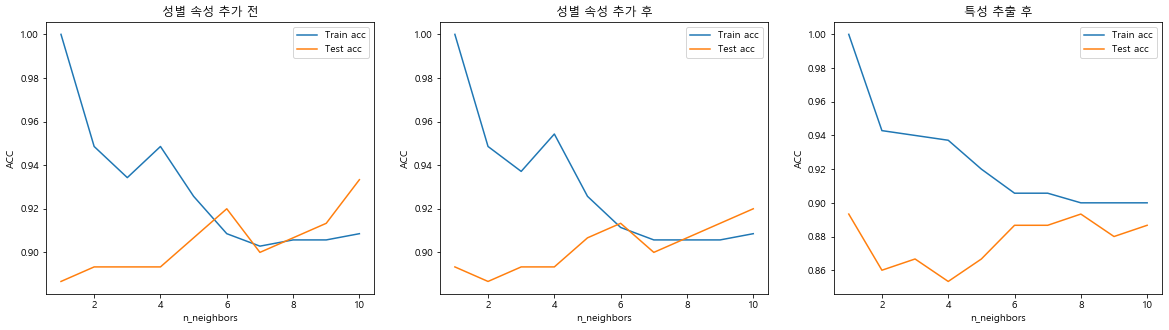

In [136]:
plt.figure(figsize = (20,5))

# 이전 차트 출력
plt.subplot(1,3,1) #(행,열,현재데이터)    ==>  첫번째 차트
plt.plot(neighbor, train_acc, label = 'Train acc') #화면에 "그래프" 그려주는 명령어 'plot' (x축:이웃, y축:훈련용스코어누적값, label:)
plt.plot(neighbor, test_acc, label = 'Test acc')   #(x축:이웃, y축:검증용스코어누적값, label:)
plt.legend(loc = 'best') #loc = 'best' <== 알아서 데이터없는 값 찾아서 자동으로 넣어줌
plt.ylabel('ACC')
plt.xlabel('n_neighbors')
plt.title("성별 속성 추가 전")



####이웃의 수를 1에서 10까지 변경하면서 훈련 점수를 도출 ####
train_acc2 = []  #훈련 점수를 저장할 배열, 이웃의 수에 따른...        ##누적을 위한 두 변수
test_acc2  = []  #검증 점수를 저장할 배열, 이웃의 수에 따른...

neighbor2 = range(1, 11)  #1에서 1-까지 반복 범위 설정

for n in neighbor2 : #1에서 10까지 반복 수행                      ##for문 이용하여 이웃수만큼(1~10까지) 반복하며 ==> 훈련시키고
    #반복 N값을 하이퍼파라미터인 이웃의 수에 대입  
    knn_model2 = KNeighborsClassifier(n_neighbors=n) #n값으로 모델 생성   ##=n으로 이웃바꿔가며 
    knn_model2.fit(X_train2, y_train2)                 #훈련 수행
    
    train_acc2.append(knn_model2.score(X_train2, y_train2)) #훈련데이터 스코어 도출 및 저장        ##평가
    test_acc2.append(knn_model2.score(X_test2, y_test2))
    
    
    
plt.subplot(1,3,2)#(행,열,현재데이터)    ==>  두번째 차트
plt.plot(neighbor2, train_acc2, label = 'Train acc') 
plt.plot(neighbor2, test_acc2, label = 'Test acc')
plt.legend(loc = 'best')
plt.ylabel('ACC')
plt.xlabel('n_neighbors')
plt.title("성별 속성 추가 후")



train_acc3 = []  #훈련 점수를 저장할 배열, 이웃의 수에 따른...        ##누적을 위한 두 변수
test_acc3  = []  #검증 점수를 저장할 배열, 이웃의 수에 따른...

neighbor3 = range(1, 11)  #1에서 1-까지 반복 범위 설정

for n in neighbor3 : #1에서 10까지 반복 수행                      ##for문 이용하여 이웃수만큼(1~10까지) 반복하며 ==> 훈련시키고
    #반복 N값을 하이퍼파라미터인 이웃의 수에 대입  
    knn_model3 = KNeighborsClassifier(n_neighbors=n) #n값으로 모델 생성   ##=n으로 이웃바꿔가며 
    knn_model3.fit(X_train3, y_train)                 #훈련 수행
    
    train_acc3.append(knn_model3.score(X_train3, y_train)) #훈련데이터 스코어 도출 및 저장        ##평가
    test_acc3.append(knn_model3.score(X_test3, y_test))
    
    
    
plt.subplot(1,3,3)#(행,열,현재데이터)    ==>  세번째 차트
plt.plot(neighbor3, train_acc3, label = 'Train acc') 
plt.plot(neighbor3, test_acc3, label = 'Test acc')
plt.legend(loc = 'best')
plt.ylabel('ACC')
plt.xlabel('n_neighbors')
plt.title("특성 추출 후")

plt.show()